In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
     

In [4]:
pip install kaggle

In [5]:
kaggle_credentials=json.load(open("kaggle.json"))

In [6]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials["username"]
os.environ['KAGGLE_KEY']=kaggle_credentials["key"]

In [7]:
print(os.environ)

environ({'ACSVCPORT': '17532', 'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\Dev Shah\\AppData\\Roaming', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'LAPTOP-20OPNO5P', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'CONDA_PREFIX': 'C:\\Users\\Dev Shah\\anaconda3\\anaconda', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'EFC_21096': '1', 'ENABLELOG': 'INFO', 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer', 'FPS_BROWSER_USER_PROFILE_STRING': 'Default', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\Dev Shah', 'IGCCSVC_DB': 'AQAAANCMnd8BFdERjHoAwE/Cl+sBAAAA7vOjZNs12kKKONmnYjfinQQAAAACAAAAAAAQZgAAAAEAACAAAACLznq7tiII+gsSOXCacK4ZcaV/gGX4SwO3qdl71JgOzgAAAAAOgAAAAAIAACAAAAAGg/m0DagjHxuRvXKjlYjGBlnvx4ktTq8PVkuZivBGBWAAAAACYy3I5adJFeyaI/TfEM0lDReDJgAcfJ3pGHkJwsPJlku73vmWCZx+lybjeWVC1rwbaRGjV83PkIxAKchBN+D2gFoljh5euQ

In [8]:
print(kaggle_credentials)

{'username': 'vanshshah164', 'key': 'b592a35c7109a28dbfba1cac72416944'}


In [9]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
with ZipFile("plantvillage-dataset.zip") as zip_ref:
    zip_ref.extractall()

In [11]:
print(os.listdir("plantvillage dataset"))

['color', 'grayscale', 'segmented']


In [12]:
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [13]:
print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [14]:
print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [15]:
print(len(os.listdir("plantvillage dataset/color/Blueberry___healthy")))
print(os.listdir("plantvillage dataset/color/Blueberry___healthy")[:5])

1502
['008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG', '00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681.JPG', '011405e4-a92a-44b6-9f04-10fec28d93f5___RS_HL 2311.JPG', '0137389a-9b78-4a94-afdb-c2b50861f89c___RS_HL 2347.JPG', '013ffdc5-cbd1-4202-b0f1-8fd7c1ffc0b8___RS_HL 5120.JPG']


In [16]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


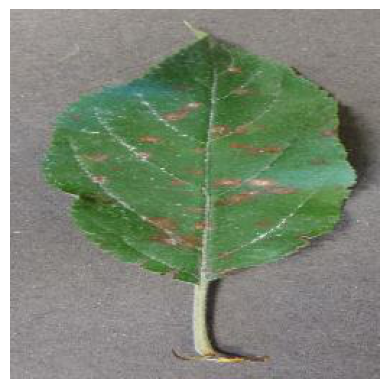

In [17]:
image_path = 'plantvillage dataset/color/Apple___Cedar_apple_rust/0ce943e7-3fed-41cb-8430-0e0f54ff2bc4___FREC_C.Rust 0014.JPG'

img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')  
plt.show()

In [18]:
img_size=224
batch_size=32

In [19]:
print(img)

[[[164 159 156]
  [165 160 157]
  [166 161 158]
  ...
  [136 131 127]
  [138 133 129]
  [136 131 127]]

 [[168 163 160]
  [169 164 161]
  [170 165 162]
  ...
  [144 139 135]
  [147 142 138]
  [147 142 138]]

 [[165 160 157]
  [164 159 156]
  [163 158 155]
  ...
  [140 135 131]
  [140 135 131]
  [138 133 129]]

 ...

 [[158 154 155]
  [154 150 151]
  [154 150 151]
  ...
  [139 135 136]
  [129 125 126]
  [116 112 113]]

 [[159 155 156]
  [153 149 150]
  [153 149 150]
  ...
  [137 133 134]
  [132 128 129]
  [125 121 122]]

 [[153 149 150]
  [146 142 143]
  [147 143 144]
  ...
  [119 115 116]
  [117 113 114]
  [117 113 114]]]


In [20]:
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [21]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [22]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

C:\Users\Dev Shah\anaconda3\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  
    epochs=5,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  
)

C:\Users\Dev Shah\anaconda3\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 8752s 6s/step - accuracy: 0.6073 - loss: 1.5821 - val_accuracy: 0.8580 - val_loss: 0.4523
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 616s 454ms/step - accuracy: 0.9262 - loss: 0.2379 - val_accuracy: 0.8371 - val_loss: 0.5320
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 621s 457ms/step - accuracy: 0.9666 - loss: 0.1040 - val_accuracy: 0.8967 - val_loss: 0.3945
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 626s 461ms/step - accuracy: 0.9784 - loss: 0.0650 - val_accuracy: 0.8643 - val_loss: 0.5599
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 625s 460ms/step - accuracy: 0.9820 - loss: 0.0592 - val_accuracy: 0.8732 - val_loss: 0.5902


In [27]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - accuracy: 0.8749 - loss: 0.5941
Validation Accuracy: 87.32%


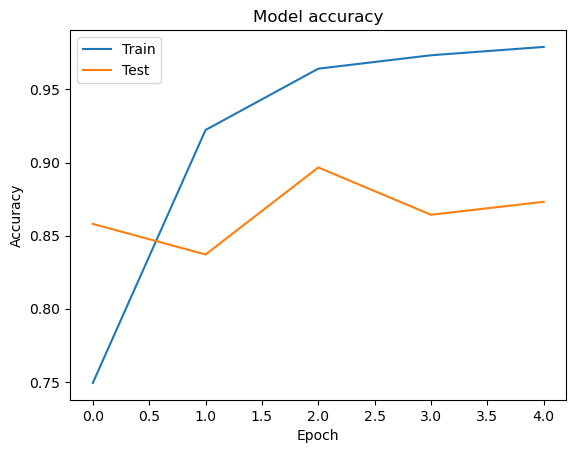

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

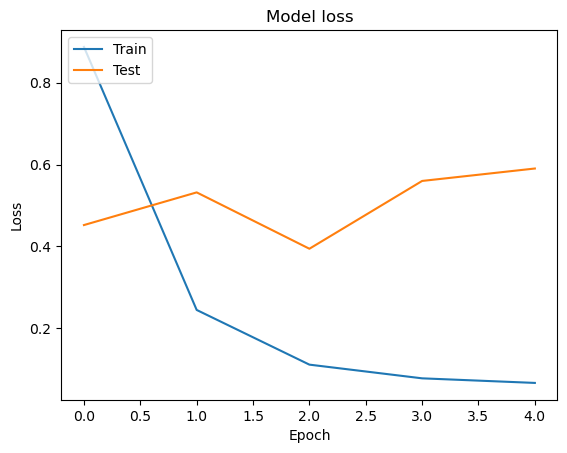

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [55]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [56]:
class_indices={v: k for k,v in train_generator.class_indices.items()}

In [57]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [58]:
json.dump(class_indices,open('class_indices.json','w'))

In [59]:
image_path=r"C:\Users\Dev Shah\Music\test_apple_black_rot.JPG"
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("Predicted Class Name: ",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predicted Class Name:  Apple___Black_rot


In [60]:
image_path=r"C:\Users\Dev Shah\Music\test_blueberry_healthy.jpg"
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("Predicted Class Name: ",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted Class Name:  Blueberry___healthy


In [61]:
image_path=r"C:\Users\Dev Shah\Music\test_potato_early_blight.jpg"
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("Predicted Class Name: ",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Predicted Class Name:  Potato___Early_blight


In [62]:
model.save('plant_disease_prediction_model.h5')